# Validation of Trained Models

In [1]:
import os
import torch

# Set-up CUDA device
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
# use a specific GPU
os.environ["CUDA_VISIBLE_DEVICES"]="4"

# Use GPU for inference
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the device being used
print(f"Using device: {device}")

# Check the GPU name
if device.type == 'cuda':
    gpu_name = torch.cuda.get_device_name(0)  # 0 because CUDA_VISIBLE_DEVICES=4 means GPU 4 is now 0
    print("Using GPU:", gpu_name)

Using device: cuda
Using GPU: NVIDIA A100-SXM4-40GB


In [2]:
detect_model_paths = ['YOLO-detect-v3/train1/weights/best.pt',
                    'YOLO-s/yolo11s-train/weights/best.pt',
                    'YOLOx-detect-v1/train1/weights/best.pt',
                    'YOLO-test/yolo11s-train3/weights/best.pt',
                    'YOLO-head/yolo11n-train/weights/best.pt',
                    'YOLO-freeze/yolo11m-train/weights/best.pt',
                    'YOLO-freeze/yolo11n-train2/weights/best.pt',
                    'YOLO-freeze-v2/yolo11m-train/weights/best.pt',
                    'YOLO-freeze-v2/yolo11n-train/weights/best.pt',
                    'YOLO-freeze-v2/yolo11n-train3/weights/best.pt',
                    'YOLO-freeze-v2/yolo11s-train/weights/best.pt'
                    ]

segment_model_paths = ['YOLO-segment-v3/train1/weights/best.pt',
                    'YOLO-s/yolo11s-seg-train/weights/best.pt',
                    'YOLOx-segment-v1/train1/weights/best.pt',
                    'YOLO-test/yolo11s-seg-train/weights/best.pt',
                    'YOLO-head/yolo11n-seg-train/weights/best.pt',
                    'YOLO-freeze/yolo11m-seg-train/weights/best.pt',
                    'YOLO-freeze/yolo11n-seg-train/weights/best.pt',
                    'YOLO-freeze-v2/yolo11m-seg-train/weights/best.pt',
                    'YOLO-freeze-v2/yolo11n-seg-train2/weights/best.pt',
                    'YOLO-freeze-v2/yolo11s-seg-train/weights/best.pt'
                    ]

In [3]:
from ultralytics import YOLO

detect_metrics = []
for model_path in detect_model_paths:
    model = YOLO(model_path)
    metrics = model.val(device=device)
    detect_metrics.append(metrics)

segment_metrics = []
for model_path in segment_model_paths:
    model = YOLO(model_path)
    metrics = model.val(device=device)
    segment_metrics.append(metrics)

YOLO11n summary (fused): 238 layers, 2,586,832 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/53 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:28<00:00,  1.89it/s]


                   all        845       1596      0.961      0.942      0.952      0.892
          bottled_soda         37         37      0.908          1      0.992      0.914
                cheese         40         58      0.976      0.948      0.955      0.895
             chocolate         42         47      0.999      0.936      0.975      0.899
                coffee         30         66      0.977      0.924      0.966      0.886
        condensed_milk         37         52      0.964          1       0.99      0.963
           cooking_oil         40         40      0.993          1      0.995      0.925
           corned_beef         41        247      0.972      0.968      0.987       0.92
                garlic         33         33      0.997       0.97      0.993      0.872
       instant_noodles         30         30       0.99          1      0.995       0.97
               ketchup         35         35      0.991          1      0.995      0.988
                 lemo

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:06<00:00,  8.02it/s]


                   all        845       1596      0.967      0.975      0.978      0.932
          bottled_soda         37         37      0.993          1      0.995       0.96
                cheese         40         58      0.993      0.948      0.962      0.901
             chocolate         42         47          1      0.964      0.993      0.945
                coffee         30         66      0.972      0.955      0.989      0.925
        condensed_milk         37         52      0.972          1      0.994      0.967
           cooking_oil         40         40      0.991          1      0.995      0.949
           corned_beef         41        247      0.976      0.981       0.99      0.944
                garlic         33         33          1      0.978      0.995      0.921
       instant_noodles         30         30      0.988          1      0.995      0.985
               ketchup         35         35          1          1      0.995      0.995
                 lemo

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:06<00:00,  8.18it/s]


                   all        845       1596      0.884      0.895       0.94      0.846
          bottled_soda         37         37      0.896      0.946      0.974      0.897
                cheese         40         58      0.871      0.793      0.883      0.734
             chocolate         42         47      0.953      0.617      0.915      0.845
                coffee         30         66      0.904      0.864      0.886      0.791
        condensed_milk         37         52       0.98      0.938      0.986      0.921
           cooking_oil         40         40       0.95          1      0.995      0.887
           corned_beef         41        247      0.942      0.951      0.976      0.833
                garlic         33         33      0.766      0.939      0.924      0.797
       instant_noodles         30         30      0.928          1      0.993      0.947
               ketchup         35         35      0.985          1      0.995      0.969
                 lemo

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:03<00:00, 13.78it/s]


                   all        845       1596      0.846      0.783      0.864      0.735
          bottled_soda         37         37      0.847      0.838      0.911      0.801
                cheese         40         58      0.769      0.569      0.732      0.586
             chocolate         42         47      0.916      0.695      0.856      0.744
                coffee         30         66        0.9      0.543      0.739      0.538
        condensed_milk         37         52      0.897      0.839      0.918      0.865
           cooking_oil         40         40      0.825      0.925      0.958      0.862
           corned_beef         41        247      0.838      0.903      0.923      0.734
                garlic         33         33      0.928      0.785      0.872      0.727
       instant_noodles         30         30      0.996      0.967      0.978      0.838
               ketchup         35         35      0.852          1      0.993      0.962
                 lemo

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:03<00:00, 14.50it/s]


                   all        845       1596      0.962      0.952      0.969      0.902
          bottled_soda         37         37      0.961          1      0.981      0.908
                cheese         40         58      0.975      0.897      0.923      0.845
             chocolate         42         47          1      0.932      0.983      0.917
                coffee         30         66          1      0.925      0.971      0.884
        condensed_milk         37         52      0.952      0.962      0.993       0.98
           cooking_oil         40         40      0.979          1      0.995      0.933
           corned_beef         41        247      0.968      0.971      0.985      0.908
                garlic         33         33      0.988      0.939      0.963      0.873
       instant_noodles         30         30          1      0.991      0.995      0.961
               ketchup         35         35       0.99          1      0.995      0.993
                 lemo

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:04<00:00, 11.27it/s]


                   all        845       1596       0.88      0.842      0.905      0.795
          bottled_soda         37         37      0.894      0.865      0.958      0.902
                cheese         40         58      0.815      0.684      0.776      0.593
             chocolate         42         47      0.933      0.787      0.891      0.786
                coffee         30         66      0.859      0.648      0.805      0.625
        condensed_milk         37         52      0.901      0.876      0.954      0.911
           cooking_oil         40         40      0.808       0.95      0.941      0.853
           corned_beef         41        247      0.927      0.932      0.966      0.822
                garlic         33         33      0.899      0.879      0.939      0.794
       instant_noodles         30         30      0.965       0.92      0.992       0.87
               ketchup         35         35      0.947          1      0.994       0.99
                 lemo

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:04<00:00, 12.95it/s]


                   all        845       1596      0.769      0.689      0.775      0.646
          bottled_soda         37         37      0.861       0.73      0.824      0.721
                cheese         40         58      0.749      0.397      0.515      0.422
             chocolate         42         47      0.867      0.617      0.753       0.62
                coffee         30         66      0.716       0.47      0.662      0.433
        condensed_milk         37         52      0.754      0.788       0.87      0.797
           cooking_oil         40         40       0.79       0.85      0.897      0.772
           corned_beef         41        247      0.849      0.826      0.905      0.725
                garlic         33         33      0.797      0.597      0.729      0.593
       instant_noodles         30         30      0.895       0.85      0.961      0.799
               ketchup         35         35      0.736      0.971      0.933       0.89
                 lemo

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:34<00:00,  1.56it/s]


                   all        845       1596      0.939      0.933      0.958      0.867
          bottled_soda         37         37      0.938      0.919      0.954      0.854
                cheese         40         58       0.98      0.867      0.914      0.789
             chocolate         42         47      0.973      0.936      0.961      0.871
                coffee         30         66      0.922      0.864      0.943       0.79
        condensed_milk         37         52      0.945          1      0.994      0.963
           cooking_oil         40         40      0.949          1      0.993      0.935
           corned_beef         41        247       0.95      0.955      0.979      0.874
                garlic         33         33      0.933       0.85      0.937      0.783
       instant_noodles         30         30      0.987          1      0.995      0.951
               ketchup         35         35       0.98          1      0.995       0.99
                 lemo

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:20<00:00,  2.62it/s]


                   all        845       1596      0.915      0.888      0.931      0.812
          bottled_soda         37         37      0.918       0.91      0.973        0.8
                cheese         40         58      0.969      0.845      0.929      0.773
             chocolate         42         47      0.976      0.851      0.916      0.786
                coffee         30         66      0.896      0.864      0.888      0.739
        condensed_milk         37         52      0.957          1      0.994      0.951
           cooking_oil         40         40          1      0.967      0.977      0.867
           corned_beef         41        247      0.933      0.911      0.956      0.826
                garlic         33         33      0.882      0.678      0.851      0.674
       instant_noodles         30         30      0.984          1      0.995        0.9
               ketchup         35         35      0.975          1      0.995      0.971
                 lemo

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:11<00:00,  4.58it/s]


                   all        845       1596      0.915      0.888      0.931      0.812
          bottled_soda         37         37      0.918       0.91      0.973        0.8
                cheese         40         58      0.969      0.845      0.929      0.773
             chocolate         42         47      0.976      0.851      0.916      0.786
                coffee         30         66      0.896      0.864      0.888      0.739
        condensed_milk         37         52      0.957          1      0.994      0.951
           cooking_oil         40         40          1      0.967      0.977      0.867
           corned_beef         41        247      0.933      0.911      0.956      0.826
                garlic         33         33      0.882      0.678      0.851      0.674
       instant_noodles         30         30      0.984          1      0.995        0.9
               ketchup         35         35      0.975          1      0.995      0.971
                 lemo

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:04<00:00, 11.04it/s]


                   all        845       1596      0.943      0.928      0.952      0.862
          bottled_soda         37         37      0.938      0.973       0.99      0.909
                cheese         40         58          1      0.857      0.928      0.795
             chocolate         42         47          1      0.861       0.95      0.887
                coffee         30         66          1      0.928      0.971      0.855
        condensed_milk         37         52      0.972          1      0.994       0.97
           cooking_oil         40         40       0.98          1      0.995      0.916
           corned_beef         41        247      0.932      0.945      0.971      0.859
                garlic         33         33      0.962      0.777      0.878      0.758
       instant_noodles         30         30      0.981          1      0.995      0.944
               ketchup         35         35      0.989          1      0.995      0.984
                 lemo

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:05<00:00, 10.02it/s]


                   all        845       1596      0.971      0.965      0.977      0.921      0.967      0.961      0.971      0.893
          bottled_soda         37         37      0.992          1      0.995      0.925      0.993          1      0.995      0.922
                cheese         40         58       0.99      0.948      0.962      0.902      0.974      0.931      0.944      0.861
             chocolate         42         47          1      0.947      0.984       0.94          1      0.946      0.984      0.918
                coffee         30         66      0.984      0.929      0.982      0.906      0.996      0.939      0.968      0.913
        condensed_milk         37         52      0.976          1      0.995       0.98      0.957      0.981      0.986      0.962
           cooking_oil         40         40      0.996          1      0.995      0.941      0.997          1      0.995      0.922
           corned_beef         41        247      0.976      0.986   

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:05<00:00, 10.07it/s]


                   all        845       1596      0.967      0.975      0.979      0.938      0.963      0.971      0.973      0.908
          bottled_soda         37         37      0.993          1      0.995      0.956      0.993          1      0.995      0.945
                cheese         40         58      0.993      0.948      0.975      0.937      0.975      0.931       0.96      0.899
             chocolate         42         47      0.996      0.979      0.985      0.963      0.996      0.979      0.985      0.933
                coffee         30         66          1      0.961      0.992      0.917      0.993      0.955       0.97      0.908
        condensed_milk         37         52      0.975          1      0.995      0.983      0.956      0.981      0.984      0.965
           cooking_oil         40         40      0.993          1      0.995      0.959      0.993          1      0.995      0.931
           corned_beef         41        247      0.982       0.98   

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:08<00:00,  6.18it/s]


                   all        845       1596       0.97      0.978       0.98      0.943      0.966      0.973      0.975      0.919
          bottled_soda         37         37      0.993          1      0.995      0.969      0.993          1      0.995       0.95
                cheese         40         58      0.995      0.948      0.979      0.941      0.977      0.931      0.966      0.914
             chocolate         42         47          1      0.983      0.995      0.963          1      0.983      0.995      0.949
                coffee         30         66      0.961      0.924      0.968      0.909      0.961      0.924      0.952      0.906
        condensed_milk         37         52      0.975          1      0.993      0.982      0.956      0.981      0.984      0.967
           cooking_oil         40         40      0.992          1      0.995      0.961      0.992          1      0.995      0.945
           corned_beef         41        247       0.98      0.987   

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:05<00:00,  9.87it/s]


                   all        845       1596      0.818      0.789      0.849      0.715      0.811      0.779      0.833      0.697
          bottled_soda         37         37      0.728      0.811       0.86      0.768      0.728      0.811       0.86      0.744
                cheese         40         58      0.812      0.552      0.702      0.516      0.814      0.552      0.678      0.515
             chocolate         42         47      0.887      0.666      0.824      0.718      0.858      0.643      0.789      0.699
                coffee         30         66      0.762       0.53      0.694       0.47      0.768       0.53      0.678      0.494
        condensed_milk         37         52      0.861      0.837      0.915      0.847      0.822      0.798      0.896      0.817
           cooking_oil         40         40      0.898        0.9      0.919      0.798        0.9      0.897      0.919      0.798
           corned_beef         41        247      0.791      0.907   

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:05<00:00, 10.47it/s]


                   all        845       1596      0.962      0.961      0.974      0.909      0.955      0.954      0.966      0.872
          bottled_soda         37         37      0.965          1      0.994       0.93      0.965          1      0.994      0.891
                cheese         40         58      0.994      0.897      0.951      0.883      0.975      0.879      0.933      0.836
             chocolate         42         47          1      0.948      0.979      0.925          1      0.948      0.979      0.891
                coffee         30         66          1      0.885      0.968      0.884          1      0.886      0.966       0.87
        condensed_milk         37         52      0.981      0.993      0.993      0.976      0.962      0.974      0.979      0.956
           cooking_oil         40         40      0.992          1      0.995      0.927      0.992          1      0.995      0.917
           corned_beef         41        247      0.979      0.972   

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:06<00:00,  7.60it/s]


                   all        845       1596      0.893      0.837      0.911      0.799      0.895      0.816      0.896      0.779
          bottled_soda         37         37      0.913      0.784      0.933      0.881      0.918      0.784      0.947      0.833
                cheese         40         58      0.782       0.68      0.786      0.592      0.779      0.655      0.786      0.641
             chocolate         42         47      0.989      0.745      0.901      0.796      0.967      0.723       0.85       0.77
                coffee         30         66      0.853      0.742      0.818      0.625      0.846      0.682      0.778      0.636
        condensed_milk         37         52      0.919      0.871      0.952       0.92      0.918      0.846      0.949      0.902
           cooking_oil         40         40      0.904      0.925       0.95      0.862      0.938      0.925       0.95      0.845
           corned_beef         41        247      0.931      0.935   

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:05<00:00,  9.94it/s]


                   all        845       1596      0.779      0.692      0.785      0.651      0.775      0.689      0.777      0.631
          bottled_soda         37         37      0.804      0.649      0.848      0.769      0.804      0.649      0.848      0.742
                cheese         40         58      0.769      0.344      0.582      0.436      0.769      0.344      0.579      0.415
             chocolate         42         47      0.728      0.574      0.702      0.567      0.701      0.553      0.665      0.529
                coffee         30         66      0.751      0.503      0.629      0.434      0.751      0.503      0.628      0.453
        condensed_milk         37         52      0.822      0.808      0.885      0.795      0.822      0.808      0.885      0.782
           cooking_oil         40         40      0.758      0.825      0.872      0.752      0.758      0.825      0.872      0.776
           corned_beef         41        247      0.848      0.866   

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:06<00:00,  8.15it/s]


                   all        845       1596      0.951      0.932      0.957      0.868      0.952      0.922      0.949      0.839
          bottled_soda         37         37      0.959      0.919      0.968      0.882      0.991      0.946      0.991      0.884
                cheese         40         58      0.998      0.897       0.92      0.801      0.981      0.876        0.9      0.774
             chocolate         42         47      0.984      0.894      0.971      0.881      0.992      0.894      0.969       0.85
                coffee         30         66      0.983      0.924      0.954      0.793          1      0.924      0.954      0.786
        condensed_milk         37         52       0.97          1      0.993      0.966      0.972          1      0.993      0.943
           cooking_oil         40         40      0.985      0.975      0.995      0.931      0.987      0.975      0.995      0.903
           corned_beef         41        247       0.95      0.955   

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:05<00:00, 10.44it/s]


                   all        845       1596      0.909      0.907      0.936       0.82      0.922      0.888      0.928      0.785
          bottled_soda         37         37      0.895      0.922      0.957      0.841      0.919      0.925      0.967      0.832
                cheese         40         58      0.934      0.845      0.904      0.737      0.948      0.828      0.884      0.689
             chocolate         42         47      0.959      0.787      0.942      0.784      0.973      0.787      0.925      0.772
                coffee         30         66      0.939      0.933      0.956      0.807      0.937      0.902       0.95      0.761
        condensed_milk         37         52      0.945      0.999      0.983      0.941      0.927      0.972      0.965      0.907
           cooking_oil         40         40      0.949      0.975       0.98      0.864      0.987      0.975       0.98      0.846
           corned_beef         41        247      0.899      0.938   

val: Scanning /raid/students/ryan/Cayas-AI-231/machine_exers/ME5/datasets/grocery/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:05<00:00,  9.87it/s]


                   all        845       1596      0.937      0.919      0.953      0.863      0.934      0.915      0.944      0.825
          bottled_soda         37         37      0.895          1      0.987      0.903      0.895          1      0.987      0.873
                cheese         40         58          1      0.859      0.916      0.776       0.98      0.841      0.891      0.742
             chocolate         42         47      0.968      0.894      0.964       0.86      0.945      0.872      0.944      0.832
                coffee         30         66      0.948      0.822      0.935      0.813      0.948      0.822      0.918      0.763
        condensed_milk         37         52      0.963      0.995      0.993      0.955      0.963      0.994      0.991      0.928
           cooking_oil         40         40          1      0.991      0.995      0.922          1      0.991      0.995      0.902
           corned_beef         41        247      0.952      0.915   

In [39]:
detect_mAP_scores = []
segment_mAP_scores = []

detect_inference_speed = []
segment_inference_speed = []

detect_mAP50_scores = []
detect_mAP75_scores = []
detect_mAP_classes = []
detect_overall_speed = []

segment_mAP50_scores = []
segment_mAP75_scores = []
segment_mAP_classes = []
segment_overall_speed = []

for metrics in detect_metrics:
    detect_mAP_scores.append(metrics.box.map)
    detect_inference_speed.append(metrics.speed['inference'])
    detect_mAP50_scores.append(metrics.box.map50)
    detect_mAP75_scores.append(metrics.box.map75)
    detect_mAP_classes.append(list(metrics.box.maps))
    detect_overall_speed.append(metrics.speed)


for metrics in segment_metrics:
    segment_mAP_scores.append(metrics.box.map)
    segment_inference_speed.append(metrics.speed['inference'])
    segment_mAP50_scores.append(metrics.box.map50)
    segment_mAP75_scores.append(metrics.box.map75)
    segment_mAP_classes.append(list(metrics.box.maps))
    segment_overall_speed.append(metrics.speed)

In [26]:
detect_model_paths = ['YOLO-detect-v3/train1/weights/best.pt',
                    'YOLO-s/yolo11s-train/weights/best.pt',
                    'YOLOx-detect-v1/train1/weights/best.pt',
                    'YOLO-test/yolo11s-train3/weights/best.pt',
                    'YOLO-head/yolo11n-train/weights/best.pt',
                    'YOLO-freeze/yolo11m-train/weights/best.pt',
                    'YOLO-freeze/yolo11n-train2/weights/best.pt',
                    'YOLO-freeze-v2/yolo11m-train/weights/best.pt',
                    'YOLO-freeze-v2/yolo11n-train/weights/best.pt',
                    'YOLO-freeze-v2/yolo11n-train3/weights/best.pt',
                    'YOLO-freeze-v2/yolo11s-train/weights/best.pt'
                    ]

segment_model_paths = ['YOLO-segment-v3/train1/weights/best.pt',
                    'YOLO-s/yolo11s-seg-train/weights/best.pt',
                    'YOLOx-segment-v1/train1/weights/best.pt',
                    'YOLO-test/yolo11s-seg-train/weights/best.pt',
                    'YOLO-head/yolo11n-seg-train/weights/best.pt',
                    'YOLO-freeze/yolo11m-seg-train/weights/best.pt',
                    'YOLO-freeze/yolo11n-seg-train/weights/best.pt',
                    'YOLO-freeze-v2/yolo11m-seg-train/weights/best.pt',
                    'YOLO-freeze-v2/yolo11n-seg-train2/weights/best.pt',
                    'YOLO-freeze-v2/yolo11s-seg-train/weights/best.pt'
                    ]


models = ["YOLO11n",
          "YOLO11s",
          "YOLO11x",
          "YOLO11s-freeze23",
          "YOLO11n-head",
          "YOLO11m-freeze23",
          "YOLO11n-freeze23",
          "YOLO11m-freeze22",
          "YOLO11n-freeze22",
          "YOLO11n-freeze22-v2",
          "YOLO11s-freeze22",
          "YOLO11n-seg",
          "YOLO11s-seg",
          "YOLO11x-seg",
          "YOLO11s-seg-freeze23",
          "YOLO11n-seg-head",
          "YOLO11m-seg-freeze23",
          "YOLO11n-seg-freeze23",
          "YOLO11m-seg-freeze22",
          "YOLO11n-seg-freeze22",
          "YOLO11s-seg-freeze22"
          ]

detect_models = ["YOLO11n",
          "YOLO11s",
          "YOLO11x",
          "YOLO11s-freeze23",
          "YOLO11n-head",
          "YOLO11m-freeze23",
          "YOLO11n-freeze23",
          "YOLO11m-freeze22",
          "YOLO11n-freeze22",
          "YOLO11n-freeze22-v2",
          "YOLO11s-freeze22"
          ]

segment_models = ["YOLO11n-seg",
          "YOLO11s-seg",
          "YOLO11x-seg",
          "YOLO11s-seg-freeze23",
          "YOLO11n-seg-head",
          "YOLO11m-seg-freeze23",
          "YOLO11n-seg-freeze23",
          "YOLO11m-seg-freeze22",
          "YOLO11n-seg-freeze22",
          "YOLO11s-seg-freeze22"
          ]

In [43]:
import json

detect_metrics_dict = {
    model: {"mAP (50-95)": mAP, 
            "mAP 50": mAP50,
            "mAP 75": mAP75,
            "class mAPs": maps,
            "inference_speed": inference_speed,
            "overall_speed": overall_speed
            }
    for model, mAP, mAP50, mAP75, maps, inference_speed, overall_speed 
                                        in zip(detect_models, 
                                              detect_mAP_scores, 
                                              detect_mAP50_scores,
                                              detect_mAP75_scores,
                                              detect_mAP_classes,
                                              detect_inference_speed,
                                              detect_overall_speed
                                              )
}

segment_metrics_dict = {
    model: {"mAP (50-95)": mAP, 
            "mAP 50": mAP50,
            "mAP 75": mAP75,
            "class mAPs": maps,
            "inference_speed": inference_speed,
            "overall_speed": overall_speed
            }
    for model, mAP, mAP50, mAP75, maps, inference_speed, overall_speed 
                                        in zip(segment_models, 
                                              segment_mAP_scores, 
                                              segment_mAP50_scores,
                                              segment_mAP75_scores,
                                              segment_mAP_classes,
                                              segment_inference_speed,
                                              segment_overall_speed
                                              )
}


In [44]:
# Save to JSON file
with open("detect_metrics.json", "w") as f:
    json.dump(detect_metrics_dict, f, indent=4)


# Save to JSON file
with open("segment_metrics.json", "w") as f:
    json.dump(segment_metrics_dict, f, indent=4)

/tmp/ipykernel_1301084/2866627521.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Inference Speed", y="mAP (50-95)", data=df, s=100, palette="tab10")


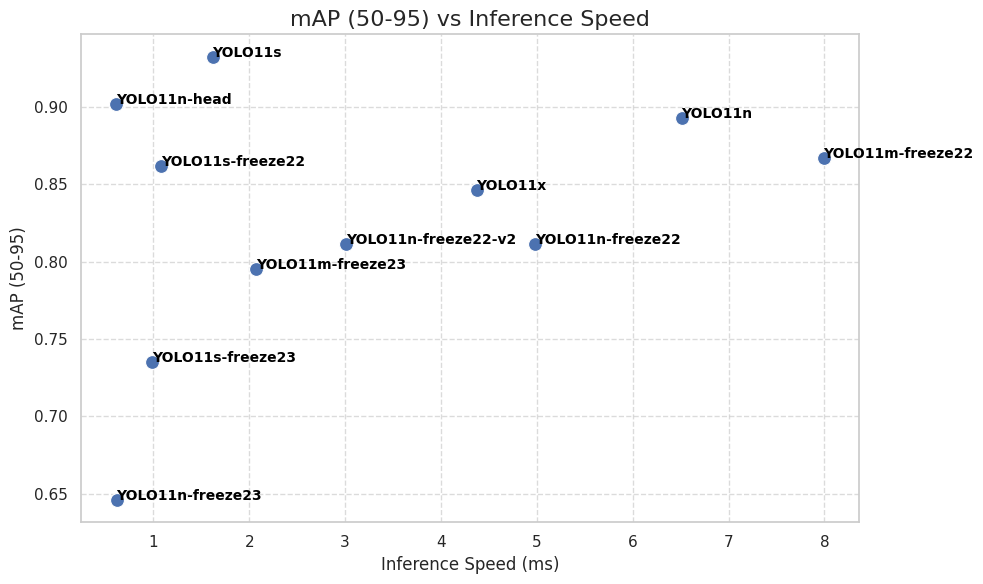

In [48]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the JSON file
with open("detect_metrics.json", "r") as f:
    detect_metrics = json.load(f)

# Extract data into a list of dictionaries
data = []
for model_name, metrics in detect_metrics.items():
    data.append({
        "Model": model_name,
        "mAP (50-95)": metrics["mAP (50-95)"],
        "Inference Speed": metrics["inference_speed"]
    })

# Convert to a DataFrame
df = pd.DataFrame(data)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Inference Speed", y="mAP (50-95)", data=df, s=100, palette="tab10")

# Annotate each point with the model name
for i in range(len(df)):
    plt.text(df["Inference Speed"].iloc[i], df["mAP (50-95)"].iloc[i], df["Model"].iloc[i], 
             horizontalalignment='left', size=10, color='black', weight='semibold')

# Add labels and title
plt.title("mAP (50-95) vs Inference Speed", fontsize=16)
plt.xlabel("Inference Speed (ms)", fontsize=12)
plt.ylabel("mAP (50-95)", fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_1301084/111459782.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Inference Speed", y="mAP (50-95)", data=df, s=100, palette="tab10")


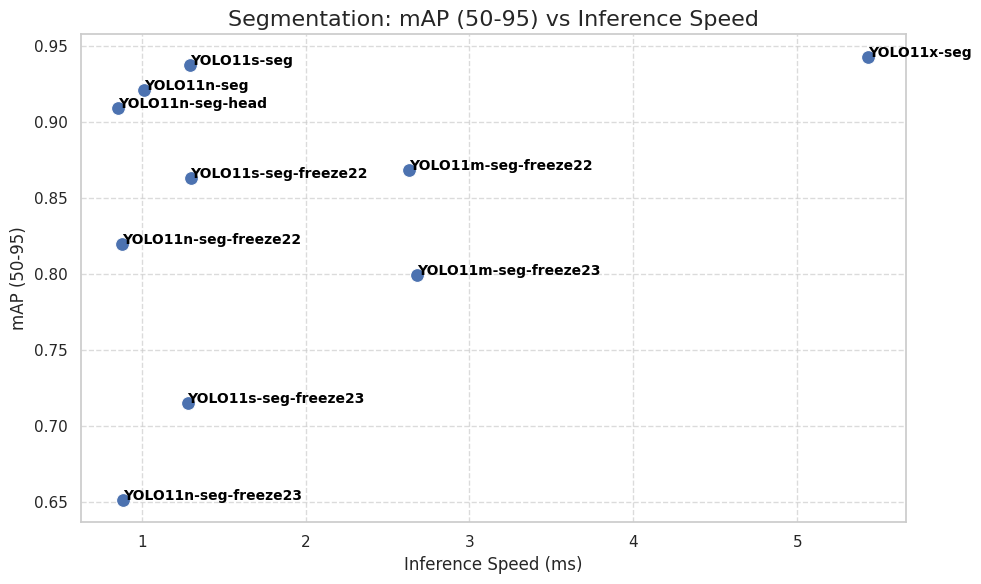

In [49]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the segment_metrics JSON file
with open("segment_metrics.json", "r") as f:
    segment_metrics = json.load(f)

# Extract data into a list of dictionaries
data = []
for model_name, metrics in segment_metrics.items():
    data.append({
        "Model": model_name,
        "mAP (50-95)": metrics["mAP (50-95)"],
        "Inference Speed": metrics["inference_speed"]
    })

# Convert to a DataFrame
df = pd.DataFrame(data)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Inference Speed", y="mAP (50-95)", data=df, s=100, palette="tab10")

# Annotate each point with the model name
for i in range(len(df)):
    plt.text(df["Inference Speed"].iloc[i], df["mAP (50-95)"].iloc[i], df["Model"].iloc[i], 
             horizontalalignment='left', size=10, color='black', weight='semibold')

# Add labels and title
plt.title("Segmentation: mAP (50-95) vs Inference Speed", fontsize=16)
plt.xlabel("Inference Speed (ms)", fontsize=12)
plt.ylabel("mAP (50-95)", fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
